# 1. Chargement et exploration initiale des données
• Importer les bibliothèques nécessaires (pandas, numpy, matplotlib, seaborn, 
sklearn) <br>
• Charger le dataset <br>
• Afficher les premières lignes et les informations de base (types de données, 
statistiques descriptives

In [2]:
#Projet Python pour data sciences 
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb, sklearn as sk
df=pd.read_csv("Engineering_graduate_salary.csv")

df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [4]:
df.describe()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2.998000e+03,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,6.648926e+05,77.666264,2008.080720,74.341061,5210.210807,1.924616,71.509857,5210.210807,0.296197,2011.939960,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,3.648951e+05,10.002785,1.631814,11.120299,4776.609877,0.264053,8.122462,4776.609877,0.456655,36.780582,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,1.124400e+04,43.000000,1998.000000,40.000000,2.000000,1.000000,6.630000,2.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,3.334648e+05,71.140000,2007.000000,66.000000,526.250000,2.000000,66.530000,526.250000,0.000000,2012.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,6.396945e+05,78.965000,2008.000000,74.000000,4027.500000,2.000000,71.800000,4027.500000,0.000000,2013.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,9.951770e+05,85.600000,2009.000000,82.600000,8822.250000,2.000000,76.300000,8822.250000,1.000000,2014.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,1.297877e+06,97.760000,2012.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


# 2. Nettoyage et préparation des données
• Identifier et gérer les valeurs manquantes <br>
• Utiliser des techniques comme l'imputation par la moyenne/médiane ou 
des méthodes plus avancées <br>
• Détecter et traiter les valeurs aberrantes<br>
• Utiliser la méthode IQR (IQR = Q3 - Q1) ou z-score pour identifier les 
outliers<br>
• Décider de les supprimer ou de les transformer selon le contexte


In [5]:
nombre_de_lignes = df.shape[0]
print("Nombre de lignes :", nombre_de_lignes)

# Identification des valeurs manquantes
valeurs_vides = df.isnull().sum()

# On ne veut afficher que les colonnes ayant des valeurs manquantes 
colonnes_vides = valeurs_vides[valeurs_vides != 0]
print("Colonnes vides : ")
print(colonnes_vides)

Nombre de lignes : 2998
Colonnes vides : 
Series([], dtype: int64)


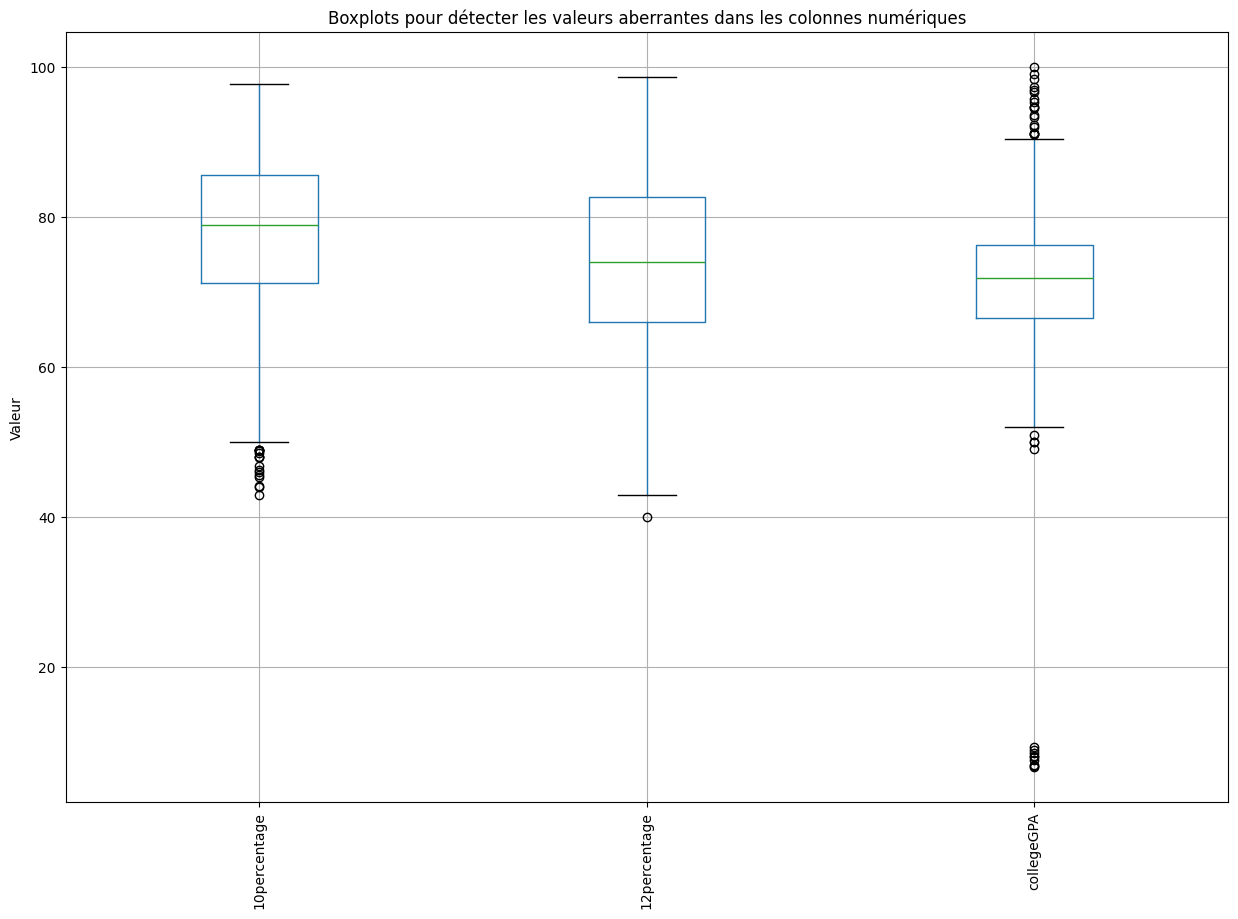

In [6]:

# Liste des colonnes numériques pour détecter les valeurs aberrantes
colonnes_numeriques = [
    '10percentage', '12percentage', 'collegeGPA'
]

# Créer des boxplots pour chaque colonne
plt.figure(figsize=(15, 10))
df[colonnes_numeriques].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots pour détecter les valeurs aberrantes dans les colonnes numériques")
plt.ylabel("Valeur")
plt.show()


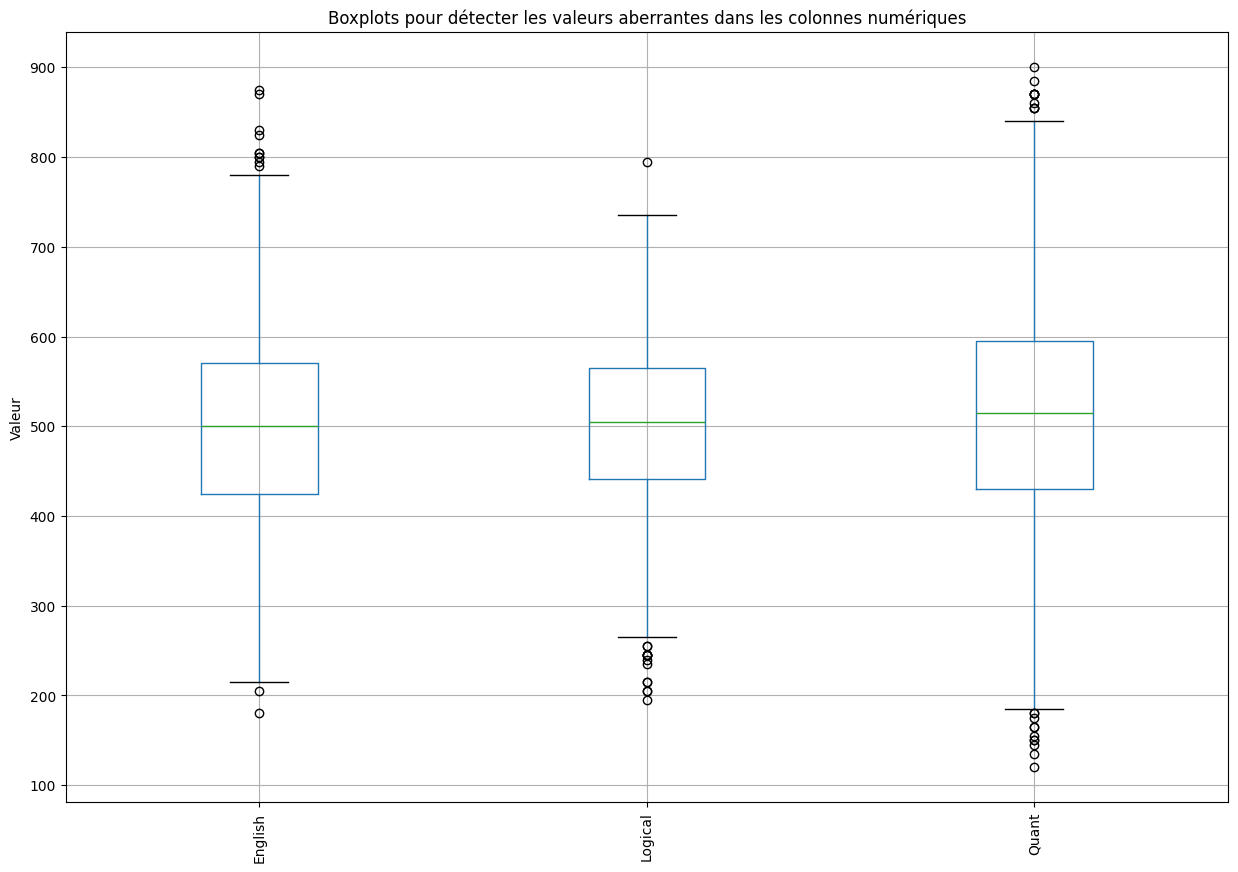

In [7]:

# Liste des colonnes numériques pour détecter les valeurs aberrantes
colonnes_numeriques = [
    'English', 'Logical', 'Quant'
]

# Créer des boxplots pour chaque colonne
plt.figure(figsize=(15, 10))
df[colonnes_numeriques].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots pour détecter les valeurs aberrantes dans les colonnes numériques")
plt.ylabel("Valeur")
plt.show()


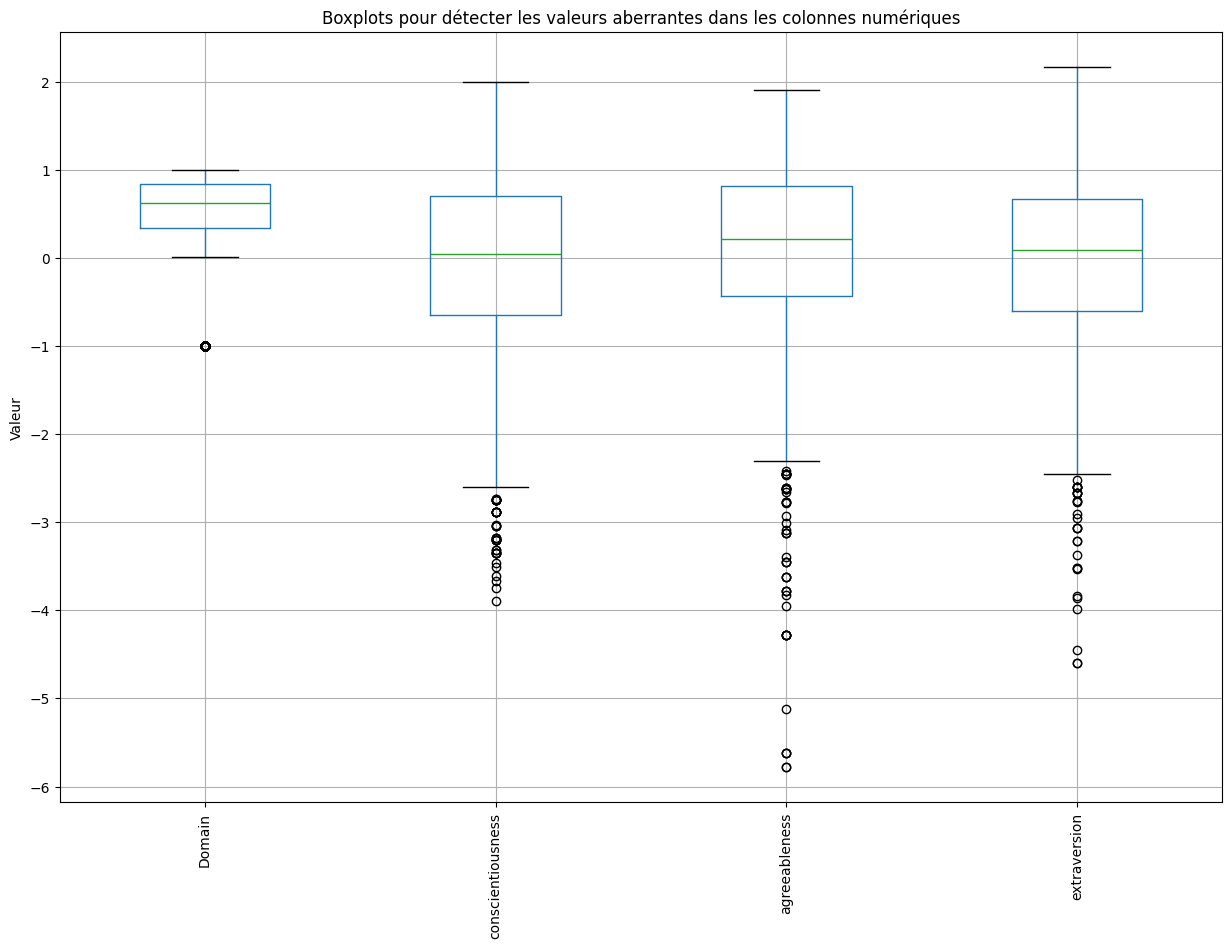

In [8]:
# Liste des colonnes numériques pour détecter les valeurs aberrantes
colonnes_numeriques = [
    'Domain', 'conscientiousness', 'agreeableness', 'extraversion'
]

# Créer des boxplots pour chaque colonne
plt.figure(figsize=(15, 10))
df[colonnes_numeriques].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots pour détecter les valeurs aberrantes dans les colonnes numériques")
plt.ylabel("Valeur")
plt.show()


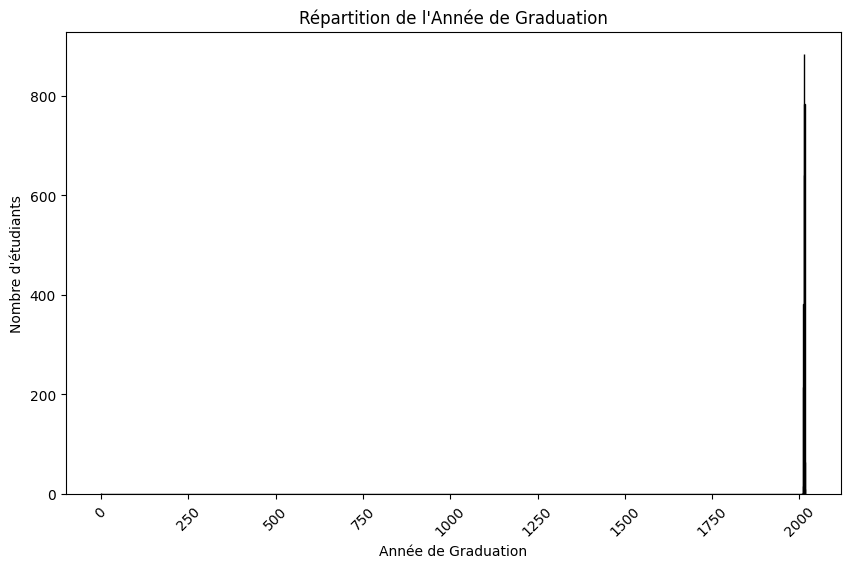

In [9]:
#Traitement Graduation year 
plt.figure(figsize=(10, 6))
plt.hist(df['GraduationYear'].dropna(), bins=range(int(df['GraduationYear'].min()), int(df['GraduationYear'].max()) + 1), edgecolor='black')
plt.xlabel("Année de Graduation")
plt.ylabel("Nombre d'étudiants")
plt.title("Répartition de l'Année de Graduation")
plt.xticks(rotation=45)

plt.show()

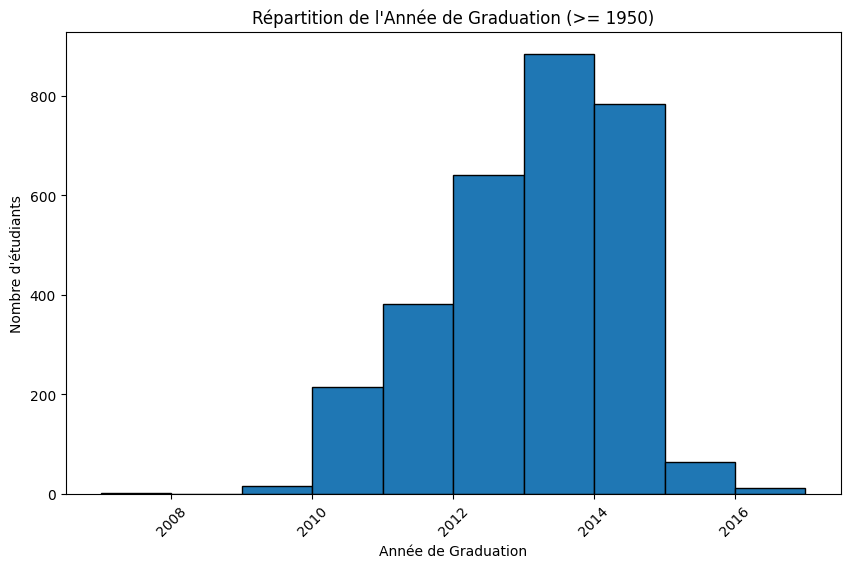

In [10]:
# Filtrer les années de graduation pour conserver celles >= 1950
df = df[df['GraduationYear'] >= 1950]

# Convertir les valeurs de GraduationYear en int
df['GraduationYear'] = df['GraduationYear'].astype(int)

# Vérification de la répartition de l'année de graduation après le filtrage et la conversion
plt.figure(figsize=(10, 6))
plt.hist(df['GraduationYear'].dropna(), bins=range(df['GraduationYear'].min(), df['GraduationYear'].max() + 1), edgecolor='black')
plt.xlabel("Année de Graduation")
plt.ylabel("Nombre d'étudiants")
plt.title("Répartition de l'Année de Graduation (>= 1950)")
plt.xticks(rotation=45)

plt.show()

In [11]:
# Trouver l'année minimale de graduation et compter les occurrences
min_year = df['GraduationYear'].min()
count_min_year = df[df['GraduationYear'] == min_year].shape[0]

print(f"L'année de graduation minimale est : {min_year}")
print(f"Nombre de personnes associées à cette année : {count_min_year}")


L'année de graduation minimale est : 2007
Nombre de personnes associées à cette année : 1


In [12]:
#CollegeID et CollegeCityID
# Comparer les colonnes CollegeID et CollegeCityID
diff_values = df[df['CollegeID'] != df['CollegeCityID']]

# Vérifier s'il y a des valeurs différentes
if not diff_values.empty:
    print("Il y a des valeurs différentes entre CollegeID et CollegeCityID.")
    print(diff_values[['CollegeID', 'CollegeCityID']])
else:
    print("Toutes les valeurs de CollegeID et CollegeCityID sont identiques.")


Toutes les valeurs de CollegeID et CollegeCityID sont identiques.


In [13]:
# Supprimer la colonne CollegeCityID
df = df.drop(columns=['CollegeCityID'])

print("La colonne 'CollegeCityID' a été supprimée.")

La colonne 'CollegeCityID' a été supprimée.


In [14]:
df.describe()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2.997000e+03,2997.000000,2997.00000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,...,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2.997000e+03
mean,6.648494e+05,77.662482,2008.08008,74.337437,5209.164498,1.924591,71.510774,0.296296,2012.611278,501.001668,...,23.997998,16.273607,31.079079,1.947948,-0.039105,0.126133,-0.008566,-0.145893,-0.140743,3.051682e+05
std,3.649483e+05,10.002310,1.63171,11.120385,4777.063346,0.264094,8.123662,0.456699,1.307539,105.262453,...,99.503648,86.068521,103.568586,32.246836,1.024921,0.955979,0.962841,1.013063,1.007100,2.123663e+05
min,1.124400e+04,43.000000,1998.00000,40.000000,2.000000,1.000000,6.630000,0.000000,2007.000000,180.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,3.334390e+05,71.130000,2007.00000,66.000000,526.000000,2.000000,66.520000,0.000000,2012.000000,425.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,6.396930e+05,78.930000,2008.00000,74.000000,4023.000000,2.000000,71.800000,0.000000,2013.000000,500.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,9.951890e+05,85.600000,2009.00000,82.600000,8823.000000,2.000000,76.300000,1.000000,2014.000000,570.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,1.297877e+06,97.760000,2012.00000,98.700000,18409.000000,2.000000,99.930000,1.000000,2017.000000,875.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


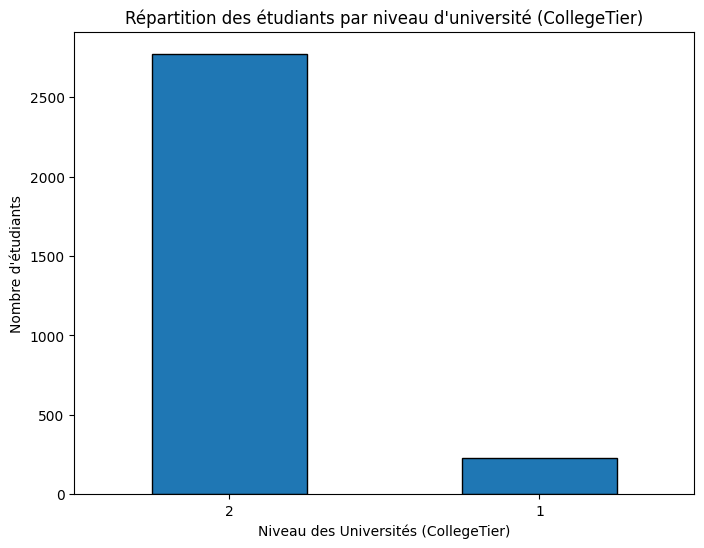

In [15]:
college_tier_counts = df['CollegeTier'].value_counts()

# Créer le graphique en barres
plt.figure(figsize=(8, 6))
college_tier_counts.plot(kind='bar', edgecolor='black')
plt.xlabel("Niveau des Universités (CollegeTier)")
plt.ylabel("Nombre d'étudiants")
plt.title("Répartition des étudiants par niveau d'université (CollegeTier)")
plt.xticks(rotation=0)

plt.show()

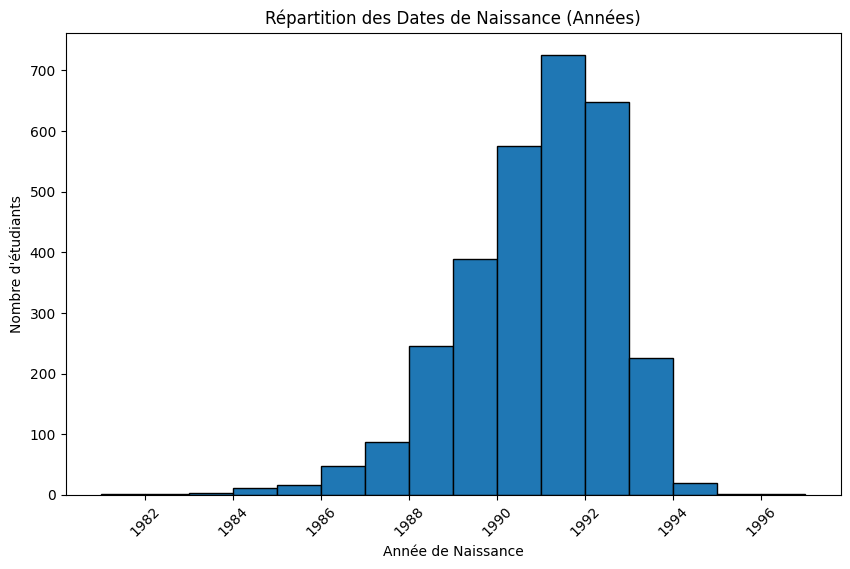

In [16]:
# Convertir la colonne DOB en type datetime si ce n'est pas déjà fait
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

# Extraire l'année de naissance pour simplifier l'affichage
df['YearOfBirth'] = df['DOB'].dt.year

# Créer l'histogramme pour visualiser la répartition des années de naissance
plt.figure(figsize=(10, 6))
plt.hist(df['YearOfBirth'].dropna(), bins=range(int(df['YearOfBirth'].min()), int(df['YearOfBirth'].max()) + 1), edgecolor='black')
plt.xlabel("Année de Naissance")
plt.ylabel("Nombre d'étudiants")
plt.title("Répartition des Dates de Naissance (Années)")
plt.xticks(rotation=45)

plt.show()


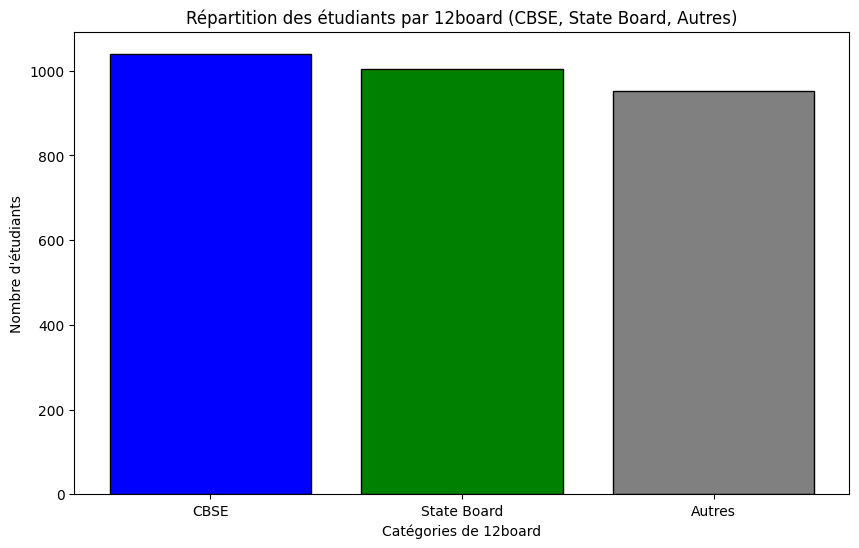

In [17]:
# Créer une nouvelle colonne pour catégoriser 12board en CBSE, State Board, et Autres
df['12board_category'] = df['12board'].apply(lambda x: 'CBSE' if 'cbse' in str(x)
                                              else 'state board' if 'state' in str(x)
                                              else 'Autres')

# Compter les occurrences de chaque catégorie
cbse_count = (df['12board_category'] == 'CBSE').sum()
state_board_count = (df['12board_category'] == 'state board').sum()
others_count = (df['12board_category'] == 'Autres').sum()

# Préparer les données pour l'histogramme
categories = ['CBSE', 'State Board', 'Autres']
counts = [cbse_count, state_board_count, others_count]

# Créer le graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['blue', 'green', 'grey'], edgecolor='black')
plt.xlabel("Catégories de 12board")
plt.ylabel("Nombre d'étudiants")
plt.title("Répartition des étudiants par 12board (CBSE, State Board, Autres)")

plt.show()

# 3. Analyse exploratoire des données (EDA)
• Visualiser la distribution des variables (histogrammes, boxplots) <br>
• Analyser les corrélations entre les variables (heatmap de corrélation)<br>
• Créer des visualisations pertinentes pour comprendre les relations entre les 
variables et le statut diabétique

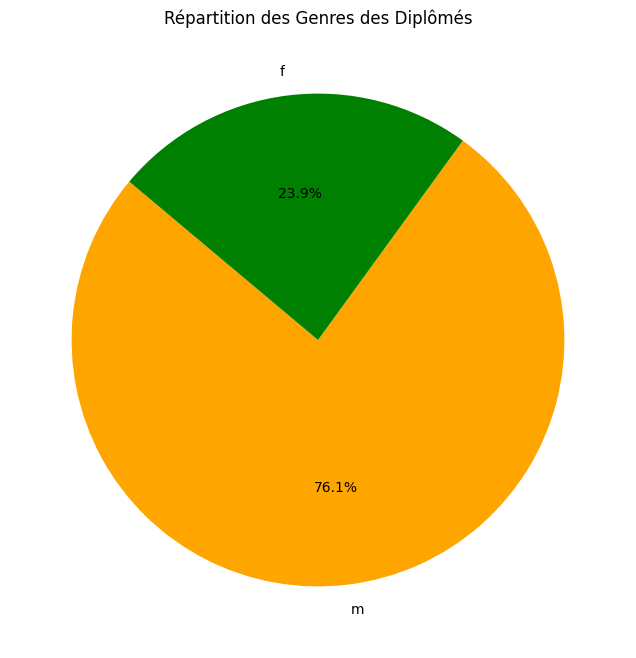

In [18]:
import matplotlib.pyplot as plt

# Graphique en secteurs pour la répartition des genres
plt.figure(figsize=(8, 8))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['orange', 'green'])
plt.title("Répartition des Genres des Diplômés")
plt.ylabel("")  # Enlever l'étiquette de l'axe y pour un meilleur affichage
plt.show()

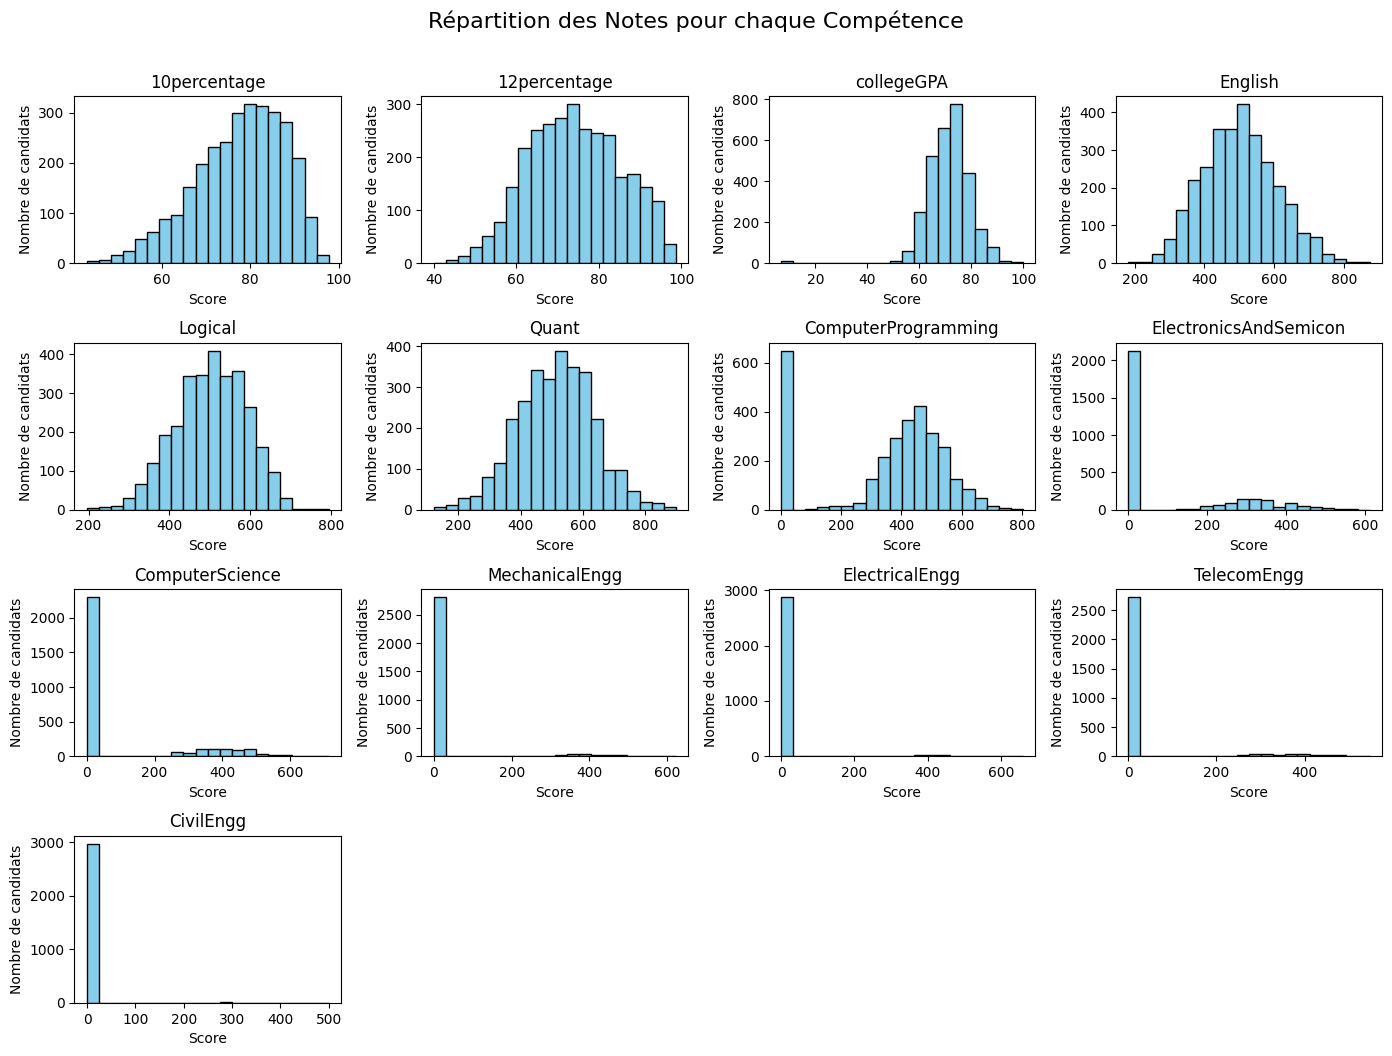

In [19]:
# Liste des colonnes contenant les notes ou scores des candidats
note_columns = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 
                'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 
                'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

# Tracer la répartition des notes pour chaque colonne
plt.figure(figsize=(14, 10))
for i, col in enumerate(note_columns, 1):
    plt.subplot(4, 4, i)  # Subplots 4x4 (ajustement automatique selon le nombre de colonnes)
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Score')
    plt.ylabel('Nombre de candidats')
    plt.tight_layout(pad=1.0)

plt.suptitle("Répartition des Notes pour chaque Compétence", y=1.05, fontsize=16)
plt.show()

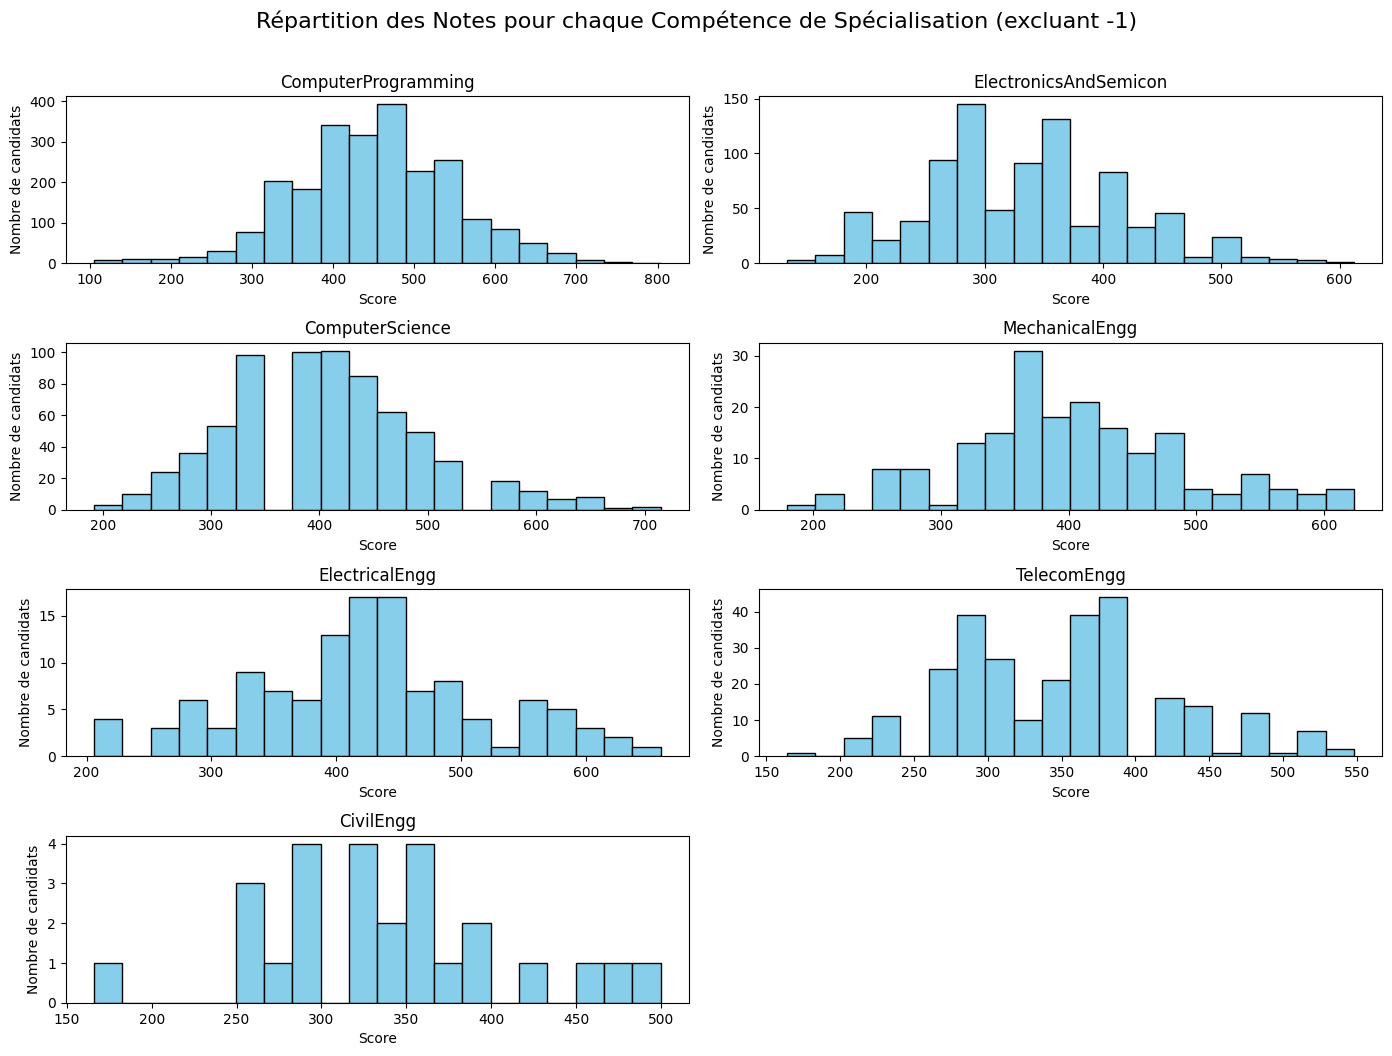

In [20]:
# Exclure les valeurs -1 pour les colonnes de spécialisation avant de tracer les histogrammes
note_columns_specialisation = ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 
                               'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

# Tracer la répartition des notes pour chaque colonne de spécialisation, sans les -1
plt.figure(figsize=(14, 10))
for i, col in enumerate(note_columns_specialisation, 1):
    plt.subplot(4, 2, i)  # Subplots arrangés pour une meilleure visibilité
    plt.hist(df[col][df[col] != -1].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Score')
    plt.ylabel('Nombre de candidats')
    plt.tight_layout(pad=1.0)

plt.suptitle("Répartition des Notes pour chaque Compétence de Spécialisation (excluant -1)", y=1.05, fontsize=16)
plt.show()

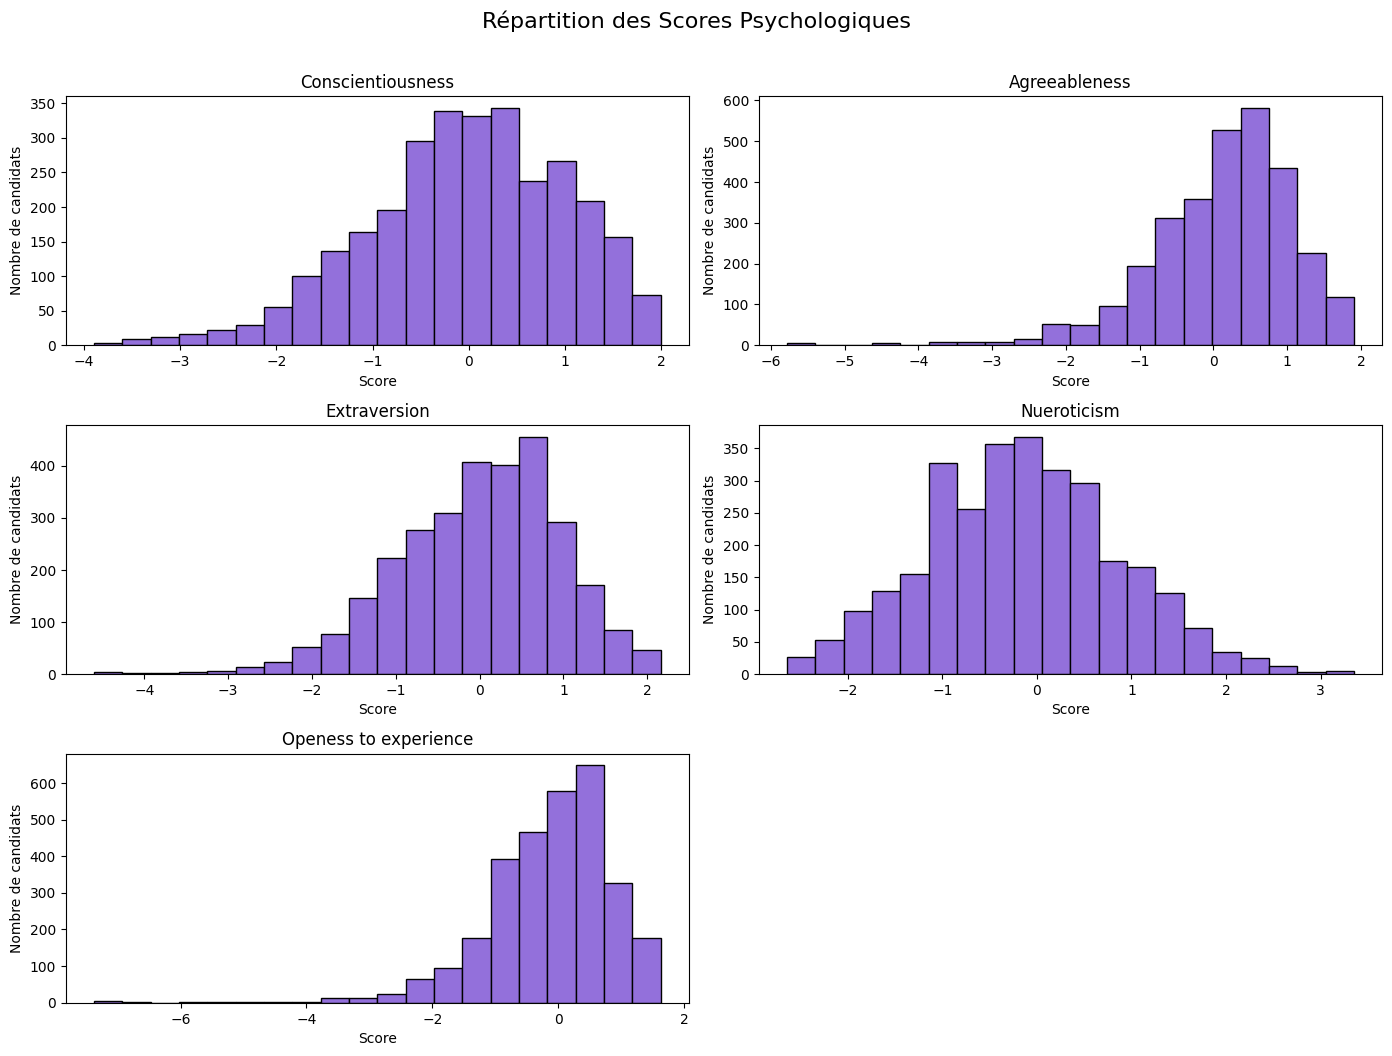

In [22]:
# Liste des colonnes de scores psychologiques avec les noms corrigés
psychological_scores_corrected = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

# Tracer la répartition des scores psychologiques avec les noms corrigés
plt.figure(figsize=(14, 10))
for i, col in enumerate(psychological_scores_corrected, 1):
    plt.subplot(3, 2, i)
    plt.hist(df[col].dropna(), bins=20, color='mediumpurple', edgecolor='black')
    plt.title(col.capitalize().replace("_", " "))
    plt.xlabel("Score")
    plt.ylabel("Nombre de candidats")
    plt.tight_layout(pad=1.0)

plt.suptitle("Répartition des Scores Psychologiques", y=1.05, fontsize=16)
plt.show()


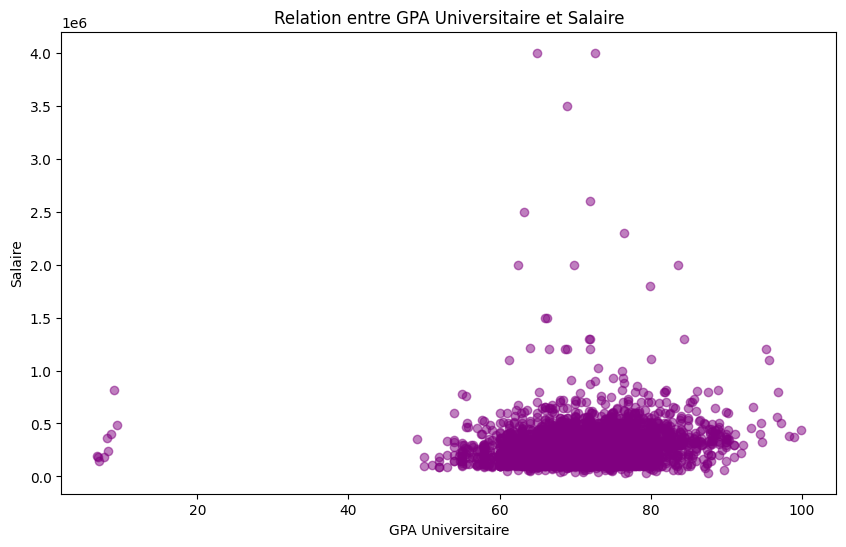

In [23]:
# Commencons à présent à mettre en relation différentes variables :

# Nuage de points pour la relation entre GPA universitaire et salaire
plt.figure(figsize=(10, 6))
plt.scatter(df['collegeGPA'], df['Salary'], alpha=0.5, color='purple')
plt.title("Relation entre GPA Universitaire et Salaire")
plt.xlabel("GPA Universitaire")
plt.ylabel("Salaire")
plt.show()


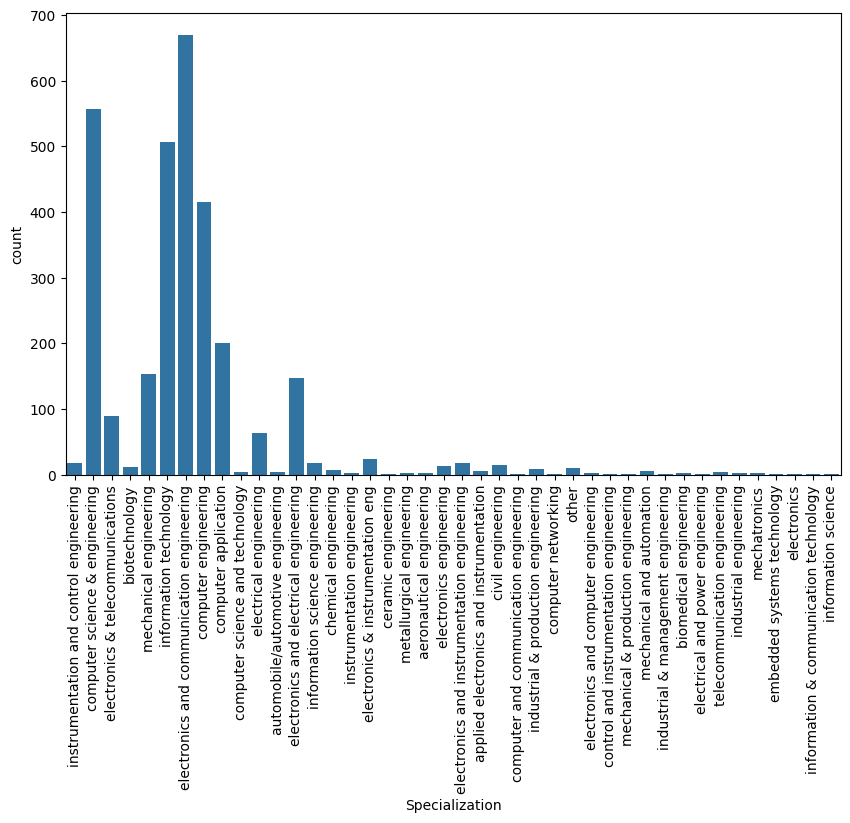

In [24]:
# repartition des étudiants selon leur specialité 
plt.figure(figsize=(10, 6))
sb.countplot(data=df, x='Specialization')
plt.xticks(rotation=90)
plt.show()

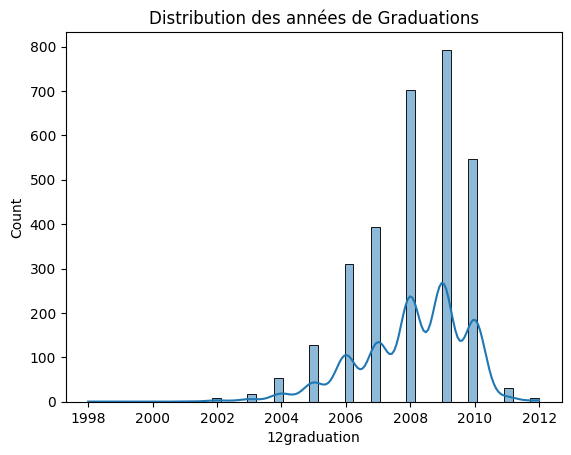

In [25]:
# Distribution des Graduations maximales
sb.histplot(df['12graduation'], kde=True)
plt.title('Distribution des années de Graduations')
plt.show()

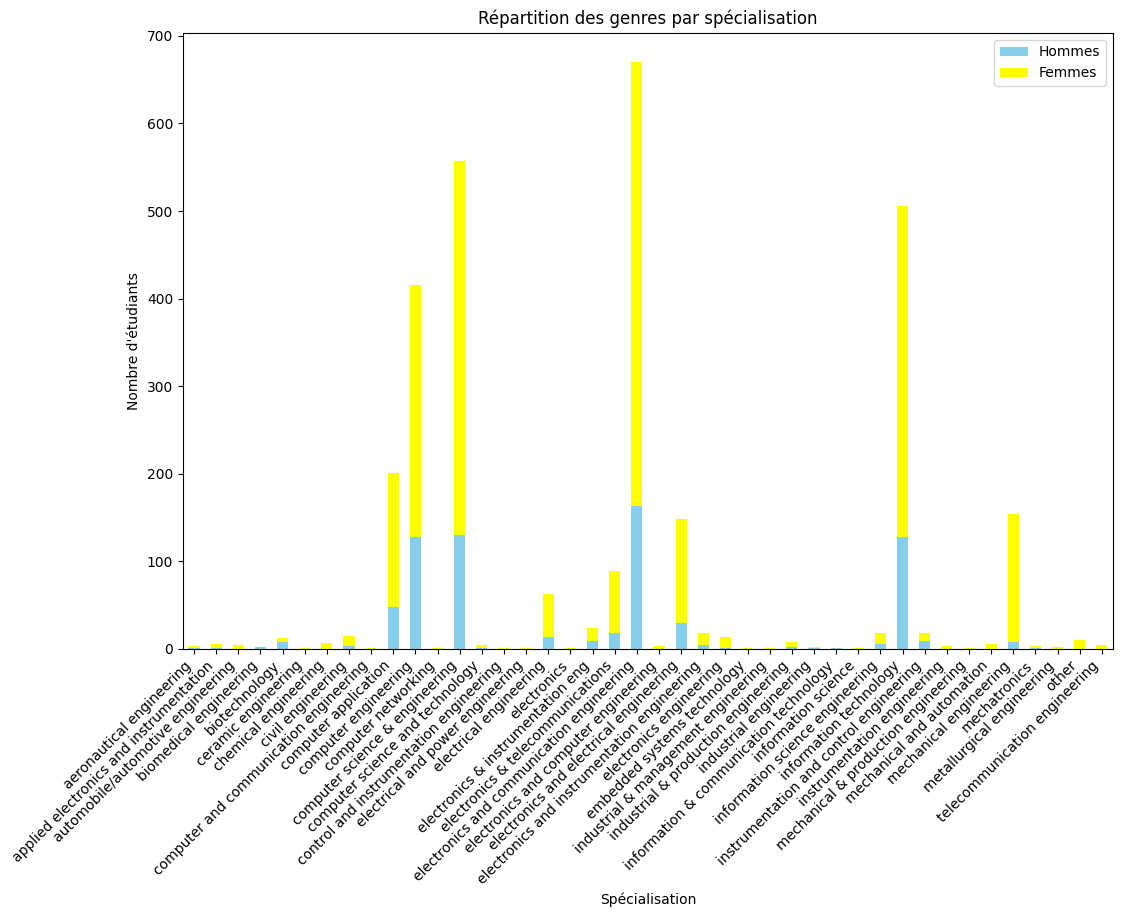

In [26]:
# répartion H/F par spécialisation
# Compter le nombre d'hommes et de femmes par spécialisation
gender_specialization = df.groupby(['Specialization', 'Gender']).size().unstack()

# Créer le graphique en barres empilées
gender_specialization.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'yellow'])
plt.title('Répartition des genres par spécialisation')
plt.xlabel('Spécialisation')
plt.ylabel('Nombre d\'étudiants')
plt.legend(['Hommes', 'Femmes'])
plt.xticks(rotation=45, ha='right')
plt.show()

# 4. Préparation pour la modélisation
• Diviser les données en ensembles d'entraînement et de test <br>
• Normaliser/standardiser les features ( caractéristiques) si nécessaire

In [27]:
print("hello")

hello


# 5. Régression linéaire
• Implémenter une régression linéaire multiple pour prédire une variable continue <br>
• Évaluer le modèle (R², RMSE) et interpréter les coefficients

# 6. Classification et Machine Learning
• Comparer ces algorithmes et choisir le plus adapté pour votre étude : <br>
    •  Régression logistique<br>
    • Arbre de décision<br>
    • Random Forest<br>
• SVM<br>
• Évaluer les performances (précision, rappel, F1-score, courbe ROC)<br>
• Optimiser les hyperparamètres avec GridSearchCV ou RandomizedSearchCV

# 8. Prédiction et Déploiement du Modèle
• Sélectionner le meilleur modèle basé sur les performances<br>
• Entraîner le modèle final sur l'ensemble des données<br>
• Créer une fonction de prédiction qui prend en entrée des caractéristiques
(features) et permet de prédire des résultats (à vous de préciser quel type de 
résultat prédire)<br>
• Développer une interface simple pour utiliser le modèle (par exemple, avec 
Streamlit ou Flask)


# 9. Interprétation et conclusions
• Résumer les principaux insights de l'analyse<br>
• Identifier les facteurs les plus importants pour la prédiction selon le domaine 
choisi<br>
• Proposer des recommandations basées sur les résultats